# Projet: Analyse Exploratoire des Données
(Exploratory Data Analysis)
- Boukhatem Abdelilah
- Rime Znady

# Importation des bibliothèques nécessaires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Charger le fichier CSV

In [5]:
df = pd.read_csv('../data/disney.csv')

In [6]:
df.shape

(1450, 12)

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
df = df.copy()

In [10]:
pd.to_datetime(df['date_added'])

0      2021-11-26
1      2021-11-26
2      2021-11-26
3      2021-11-26
4      2021-11-25
          ...    
1445   2021-06-04
1446   2021-04-02
1447   2020-12-18
1448   2020-09-18
1449   2020-04-01
Name: date_added, Length: 1450, dtype: datetime64[ns]

In [11]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Question1: 

Top 5 des meilleures catégories

Compter le nombre d'occurrences de chaque catégorie

In [12]:
category_count = df['listed_in'].value_counts()

In [13]:
print(category_count)

listed_in
Animation, Comedy, Family                        124
Action-Adventure, Animation, Comedy               77
Action-Adventure, Animation, Kids                 45
Action-Adventure, Animation, Family               40
Animals & Nature, Documentary, Family             40
                                                ... 
Animals & Nature, Family, Reality                  1
Dance, Music, Musical                              1
Comedy, Family, Lifestyle                          1
Buddy, Docuseries                                  1
Action-Adventure, Animals & Nature, Animation      1
Name: count, Length: 329, dtype: int64


Sélectionner les cinq catégories les plus fréquentes

In [14]:
top_five = category_count.head(5)

In [15]:
print(top_five)

listed_in
Animation, Comedy, Family                124
Action-Adventure, Animation, Comedy       77
Action-Adventure, Animation, Kids         45
Action-Adventure, Animation, Family       40
Animals & Nature, Documentary, Family     40
Name: count, dtype: int64


visualisation des données

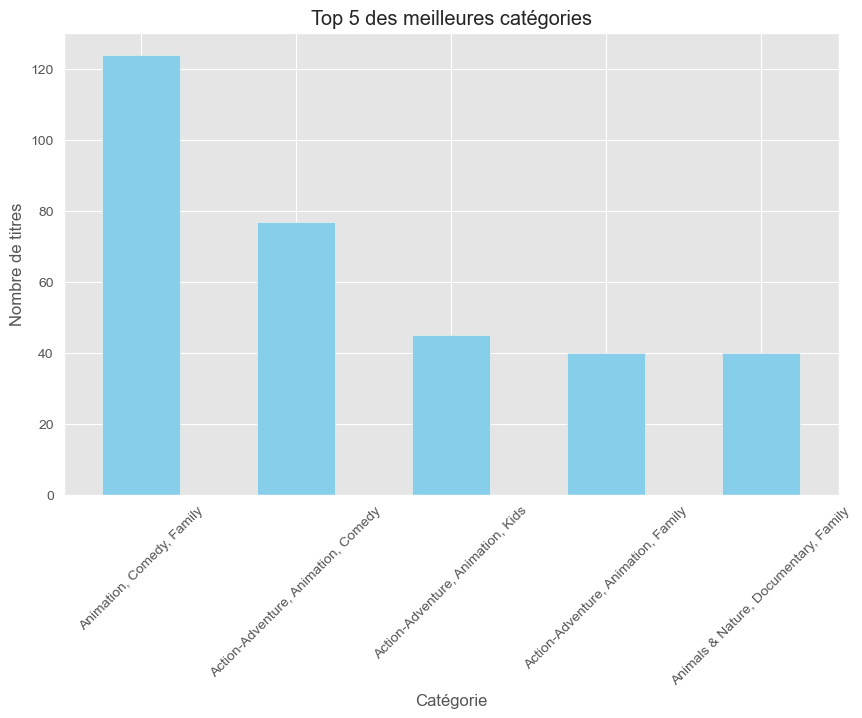

In [16]:
plt.figure(figsize=(10,6))
top_five.plot(kind='bar', color='skyblue')
plt.title('Top 5 des meilleures catégories')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de titres')
plt.xticks(rotation=45)
plt.show()

# Question 2

Top 5 des réalisateurs

Compter le nombre d'occurrences de chaque réalisateur

In [17]:
director_count = df['director'].value_counts()

 Sélectionner les cinq réalisateurs les plus fréquents

In [18]:
top_five_directors =director_count.head(5)

Afficher les cinq réalisateurs les plus fréquents

In [19]:
print(top_five_directors)

director
Jack Hannah         17
John Lasseter       16
Paul Hoen           16
Robert Stevenson    12
Charles Nichols     12
Name: count, dtype: int64


visualiser les 5 meilleurs réalisateurs

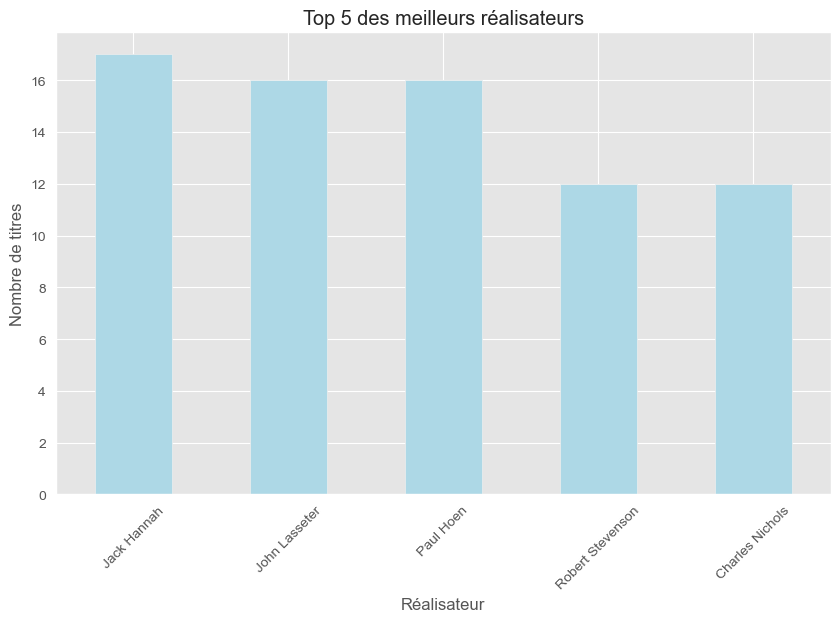

In [20]:
plt.figure(figsize=(10,6))
top_five_directors.plot(kind='bar', color='lightblue')
plt.title('Top 5 des meilleurs réalisateurs')
plt.xlabel('Réalisateur')
plt.ylabel('Nombre de titres')
plt.xticks(rotation=45)
plt.show()

# Question 3

Les dix meilleurs acteurs

In [21]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


Supprime les lignes avec des valeurs manquantes dans la colonne 'cast'.

In [22]:
df = df.dropna(subset=['cast'])

Divise les noms des acteurs en listes.

In [23]:
actors_list = df['cast'].str.split(', ')

Compte le nombre d'occurrences de chaque acteur dans toutes les listes.

In [24]:
actor_count = pd.Series([actor for sublist in actors_list for actor in sublist]).value_counts()

Sélectionne les dix acteurs les plus fréquents.

In [25]:
top_10_actors = actor_count.head(10)

In [26]:
print(top_10_actors)

Jim Cummings            33
Walt Disney             20
Bill Farmer             18
Larry the Cable Guy     17
Tress MacNeille         16
Corey Burton            16
Keith Ferguson          16
Pinto Colvig            15
Bob Peterson            15
Jeff Bennett            15
Name: count, dtype: int64


Trace un graphique à barres pour visualiser les dix acteurs les plus fréquents.

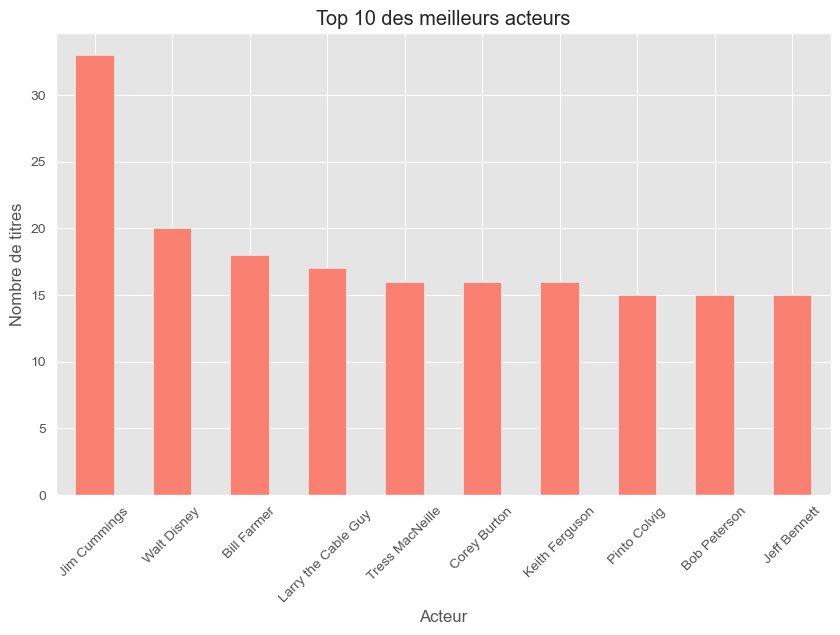

In [27]:
plt.figure(figsize=(10,6))
top_10_actors.plot(kind='bar', color='salmon')
plt.title('Top 10 des meilleurs acteurs')
plt.xlabel('Acteur')
plt.ylabel('Nombre de titres')
plt.xticks(rotation=45)
plt.show()

# Question 4

Les cinq meilleures séries télévisées avec le plus grand nombre de saisons

Filtrer les lignes pour inclure uniquement les séries télévisées

In [28]:
tv_shows = df[df['type'] == 'TV Show']

Compter le nombre d'occurrences de chaque titre de série télévisée et sélectionner les cinq premiers

In [29]:
top_tv_shows = tv_shows['title'].value_counts().head(5)

Tracer un graphique à barres pour visualiser les cinq meilleures séries télévisées avec le plus grand nombre de saisons

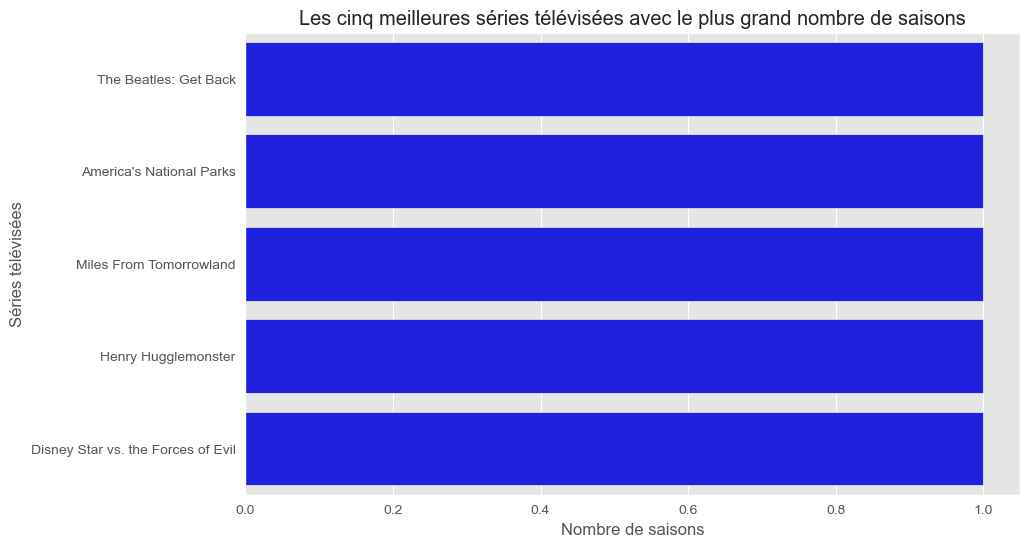

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tv_shows.values, y=top_tv_shows.index, color='blue')
plt.title('Les cinq meilleures séries télévisées avec le plus grand nombre de saisons')
plt.xlabel('Nombre de saisons')
plt.ylabel('Séries télévisées')
plt.show()

# Question 5

Identifier des contenus similaires en faisant correspondre des caractéristiques textuelles

5.1 Créer un vectoriseur TF-IDF avec les mots vides en anglais

In [31]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

5.2 Vectoriser les descriptions des contenus à l'aide du vectoriseur TF-IDF

In [32]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'].dropna())

5.3 Calculer les similarités cosinus entre les contenus basées sur leurs descriptions

In [33]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

5.4 Trouver les indices des contenus similaires au premier contenu (celui avec l'indice 0)

In [34]:
similar_indices = cosine_similarities[0].argsort()[:-6:-1]

5.5 Créer une liste de tuples contenant les titres des contenus similaires et leurs scores de similarité

In [35]:
similar_items = [(df['title'].iloc[i], cosine_similarities[0][i]) for i in similar_indices]

5.6 Afficher les contenus similaires au premier contenu

In [38]:
print("Contenus similaires au premier contenu:")
for item in similar_items:
    print(item)

Contenus similaires au premier contenu:
('Duck the Halls: A Mickey Mouse Christmas Special', 1.0)
("Mickey's Birthday Party", 0.25219634021666276)
('Toy Story of Terror!', 0.24166015994771203)
("Mickey's Once Upon a Christmas", 0.2296532629440311)
('Toy Story 2', 0.2275530688418298)


# Qestion 6

Disney se concentre-t-il davantage sur les séries télévisées que sur les films ces dernières années ?

Convertir la colonne 'release_year' en datetime avec le format '%Y'

In [47]:
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

Filtrer les années récentes à partir de 2015

In [48]:
recent_years = df[df['release_year'] >= pd.to_datetime('2015', format='%Y')]

Regrouper les contenus par année de sortie et type (film ou série télévisée) et calculer le nombre de contenus pour chaque combinaison

In [49]:
content_trends = recent_years.groupby(['release_year', 'type']).size().unstack().fillna(0)

Tracer un graphique à barres empilées pour les tendances des contenus

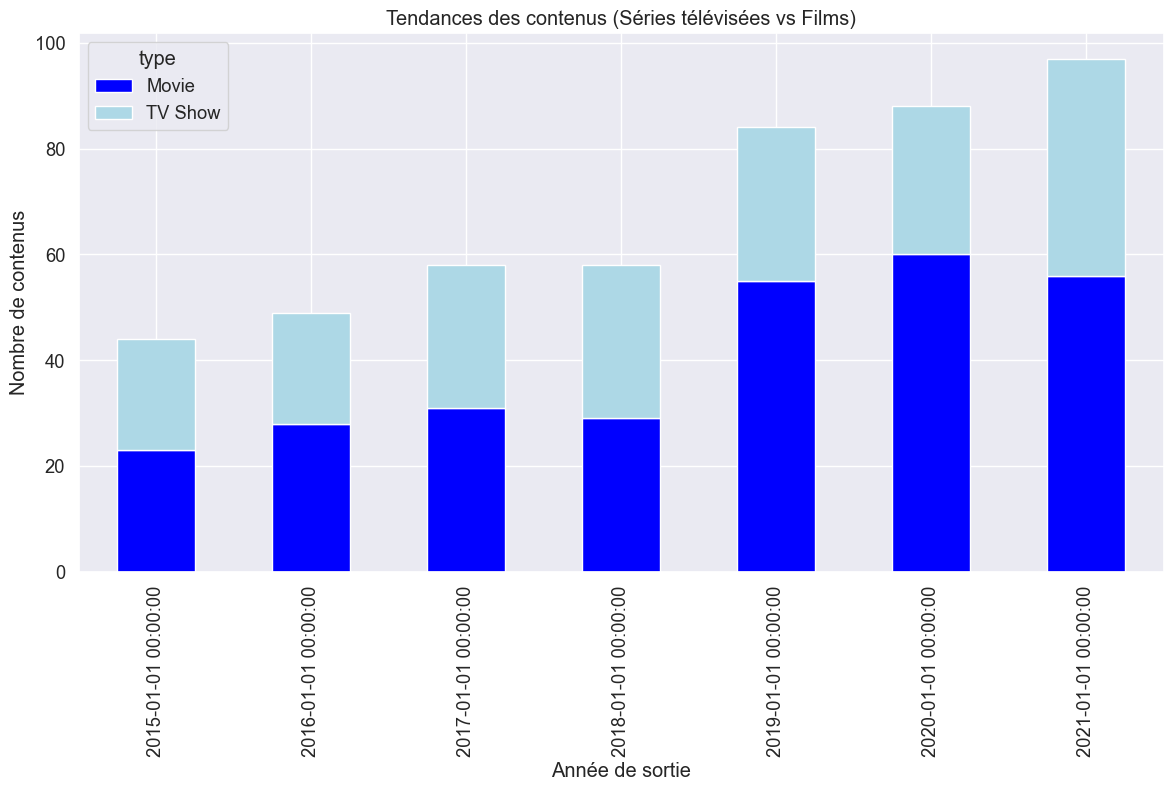

In [51]:
content_trends.plot(kind='bar', stacked=True, figsize=(14, 7), color=['blue', 'lightblue'])
plt.title('Tendances des contenus (Séries télévisées vs Films)')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de contenus')
plt.show()